In [164]:
from pydataset import data

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

##### Using pydataset, load the faithful dataset and read it's documentation.

In [100]:
data("faithful", show_doc=True)

faithful

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Old Faithful Geyser Data

### Description

Waiting time between eruptions and the duration of the eruption for the Old
Faithful geyser in Yellowstone National Park, Wyoming, USA.

### Usage

    faithful

### Format

A data frame with 272 observations on 2 variables.

[,1]

eruptions

numeric

Eruption time in mins

[,2]

waiting

numeric

Waiting time to next eruption (in mins)

### Details

A closer look at `faithful$eruptions` reveals that these are heavily rounded
times originally in seconds, where multiples of 5 are more frequent than
expected under non-human measurement. For a better version of the eruption
times, see the example below.

There are many versions of this dataset around: Azzalini and Bowman (1990) use
a more complete version.

### Source

W. Härdle.

### References

Härdle, W. (1991) _Smoothing Techniques with Implementation in S_. New York:
Springer.

Azzalini, A. 

In [101]:
df = data("faithful")

In [102]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 1 to 272
Data columns (total 2 columns):
eruptions    272 non-null float64
waiting      272 non-null int64
dtypes: float64(1), int64(1)
memory usage: 6.4 KB


,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


##### What is pearson's r for the two variables?

In [104]:
df.corr()

,eruptions,waiting
eruptions,1.000000,0.900811
waiting,0.900811,1.000000


h0: eruptions and waiting are independent of each other

In [103]:
stats.pearsonr(df.eruptions, df.waiting)

(0.900811168321813, 8.129958506616769e-100)

- The p-value is signification and therefore we reject the null hypothesis that eruptions and waiting are independent

##### Visualize the relationship between the variables.

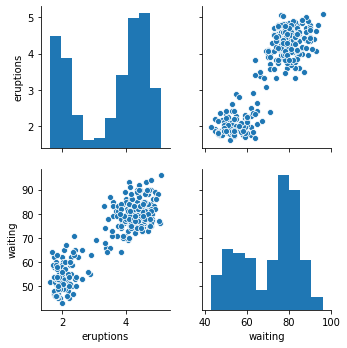

In [55]:
sns.pairplot(df)
plt.show()

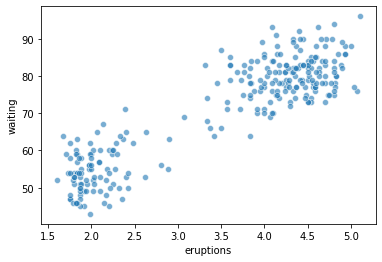

In [56]:
sns.scatterplot(df.eruptions, df.waiting, alpha=.6)
plt.show()

##### Build a linear model that predicts eruptions based on waiting.



Split the data into train and test

In [57]:
train, test = train_test_split(df, train_size=.80, random_state=123)

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 29 to 99
Data columns (total 2 columns):
eruptions    217 non-null float64
waiting      217 non-null int64
dtypes: float64(1), int64(1)
memory usage: 5.1 KB


In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 168 to 62
Data columns (total 2 columns):
eruptions    55 non-null float64
waiting      55 non-null int64
dtypes: float64(1), int64(1)
memory usage: 1.3 KB


Split the feature and target

In [173]:
X_train = train[["waiting"]]
X_test = test[["waiting"]]
y_train = train["eruptions"]
y_test = test["eruptions"]

Build model

In [174]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [175]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [179]:
pred = lm.predict(X_train)

In [180]:
mse = mean_squared_error(y_train, pred)
print("mean squared error: {:.3}".format(mse)) 

r2 = r2_score(y_train, pred)
print('{:.2%} of the variance in the waiting time can be explained by the eruptions'.format(r2))

mean squared error: 0.263
79.76% of the variance in the waiting time can be explained by the eruptions


Create a visualization with your predictions

- waiting should be on the x axis, and eruptions on the y
- Use color to differentiate the actual vs predicted values.
- Add a descriptive title.
- Change the y ticks such that they are all integers (i.e. no decimals)
- Add the root mean squared error of your predictions as an annotation

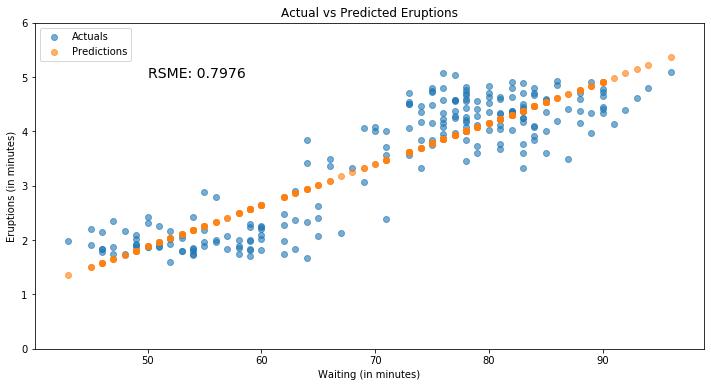

In [196]:
plt.figure(figsize=(12,6))
plt.scatter(y=y_train, x=X_train, label="Actuals", alpha=.6)
plt.scatter(y=pred, x=X_train, label="Predictions", alpha=.6)
plt.xlabel("Waiting (in minutes)")
plt.ylabel("Eruptions (in minutes)")
plt.title("Actual vs Predicted Eruptions")
plt.yticks(range(0,7))
plt.legend()
plt.text(50,5,f"RSME: {r2:.4f}", size=14)
plt.show()

In [197]:
train["yhat"] = pred
train

,eruptions,waiting,yhat
29,3.850,78,4.004156
238,4.283,77,3.928416
254,4.500,73,3.625457
6,2.883,55,2.262140
34,4.033,80,4.155635
38,4.833,80,4.155635
228,4.267,78,4.004156
170,4.617,93,5.140253
166,4.583,76,3.852676
242,2.350,47,1.656222


In [198]:
melt = train.melt(id_vars=['waiting'])
melt

,waiting,variable,value
0,78,eruptions,3.850000
1,77,eruptions,4.283000
2,73,eruptions,4.500000
3,55,eruptions,2.883000
4,80,eruptions,4.033000
5,80,eruptions,4.833000
6,78,eruptions,4.267000
7,93,eruptions,4.617000
8,76,eruptions,4.583000
9,47,eruptions,2.350000


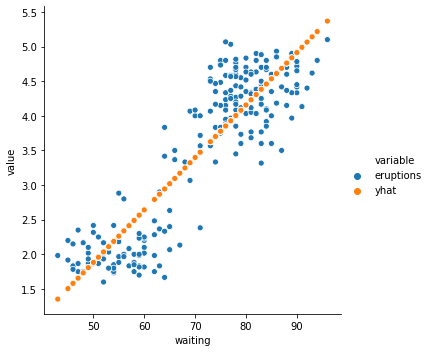

In [199]:
sns.relplot(data=melt, y="value", x="waiting", hue="variable")
plt.show()